# How to Train YOLOv5 Object Detection on a Custom Dataset

This notebook uses the YOLOv5 [Docs](https://docs.ultralytics.com/yolov5/) to train yolov5n and yolov5s versions with a custom dataset and convert them to TensorFlow Lite format. By working through this Colab, you'll be able to create and download a TFLite model that you can run on your PC, an Android phone, or an edge device like the Raspberry Pi.

In this notebook, we are going to cover:
- Before you start
- Install YOLOv5
- Download a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Predict
- Export to tflite format
- Test with dark images subset
**Let's begin!**

##1. Before we start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Jun 23 14:28:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

##2. Install YOLOv5

Clone repo and install requirements.txt in a Python>=3.8.0 environment, including PyTorch>=1.8.

In [ ]:
import os
HOME = os.path.dirname('/content/')
print(HOME)

In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16680, done.
remote: Total 16680 (delta 0), reused 0 (delta 0), pack-reused 16680
Receiving objects: 100% (16680/16680), 15.15 MiB | 15.49 MiB/s, done.
Resolving deltas: 100% (11479/11479), done.


In [ ]:
# install dependencies as necessary
%cd /content/yolov5/
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
#from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 70.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.
Setup complete. Using torch 2.3.0+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_proc

##3. Download dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ekJ5gEYpmUgNswc0SuHe")
project = rf.workspace("lamao").project("sod-enect")
version = project.version(2)
dataset = version.download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SOD-2 in yolov5pytorch:: 100%|██████████| 48000/48000 [00:16<00:00, 2867.09it/s]


##4. Training

In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data /content/yolov5/SOD-2/data.yaml --weights yolov5n.pt --name /content/custom_model/yolov5n

2024-06-23 14:39:17.764042: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 14:39:17.764092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 14:39:17.765488: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5n.pt, cfg=, data=/content/yolov5/SOD-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, 

Resume (if the trainning process is stoped)

In [ ]:
## Resume if the training process is stopped
!python train.py --resume /content/custom_model/yolov5n/weights/best.pt --name /content/custom_model/yolov5s

2024-03-06 09:37:30.847956: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 09:37:30.848035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 09:37:30.850104: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/myWorkspace/yolov5s/weights/last.pt, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weig

##5. Validate

In [ ]:
#Validate
!python val.py --data /content/yolov5/SOD-2/data.yaml --weights /content/custom_model/yolov5n/weights/best.pt

val: data=/content/yolov5/SOD-2/data.yaml, weights=['/content/custom_model/yolov5n/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1788931 parameters, 0 gradients, 4.2 GFLOPs
val: Scanning /content/yolov5/SOD-2/valid/labels.cache... 2000 images, 0 backgrounds, 0 corrupt: 100% 2000/2000 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 63/63 [00:31<00:00,  2.02it/s]
                   all       2000       6187      0.572      0.517      0.517      0.312
                 bench       2000        241      0.595      0.515      0.514       0.27
 

##6. Run inference

In [ ]:
 #Run inference
 !python detect.py --data /content/yolov5/SOD-2/data.yaml --source /content/yolov5/SOD-2/test/images --weights /content/custom_model/yolov5n/weights/best.pt

detect: weights=['/content/custom_model/yolov5n/weights/best.pt'], source=/content/yolov5/SOD-2/test/images, data=/content/yolov5/SOD-2/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1788931 parameters, 0 gradients, 4.2 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1000 /content/yolov5/SOD-2/test/images/000000004760_jpg.rf.a40a4cf8b36cf031c4134a0ef8ebf3e3.jpg: 640x640 2 benchs, 1 fire_hydrant, 1 tree, 9.9ms
image 2/1000 /content/yolov5/SOD-2/test/images/000000006040_jpg.rf.6806bb19819ecc42a814b30c8

##7. Predict

/content


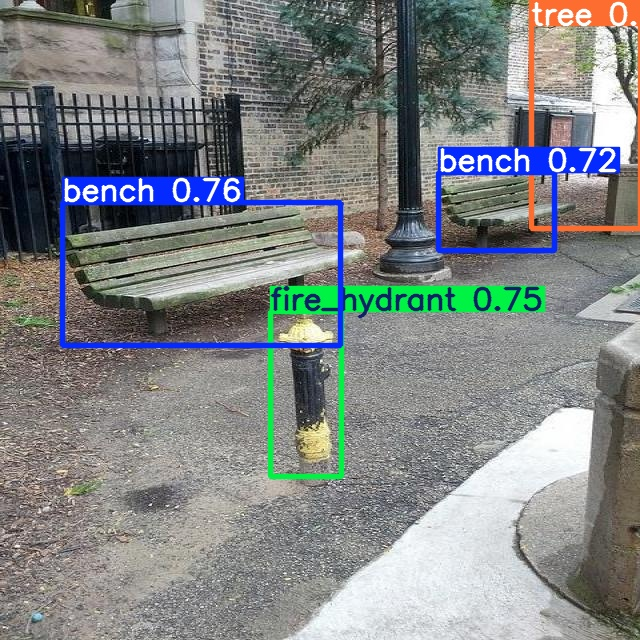

In [ ]:
%cd {HOME}
Image(filename='/content/yolov5/runs/detect/exp/000000004760_jpg.rf.a40a4cf8b36cf031c4134a0ef8ebf3e3.jpg', height=640)

/content


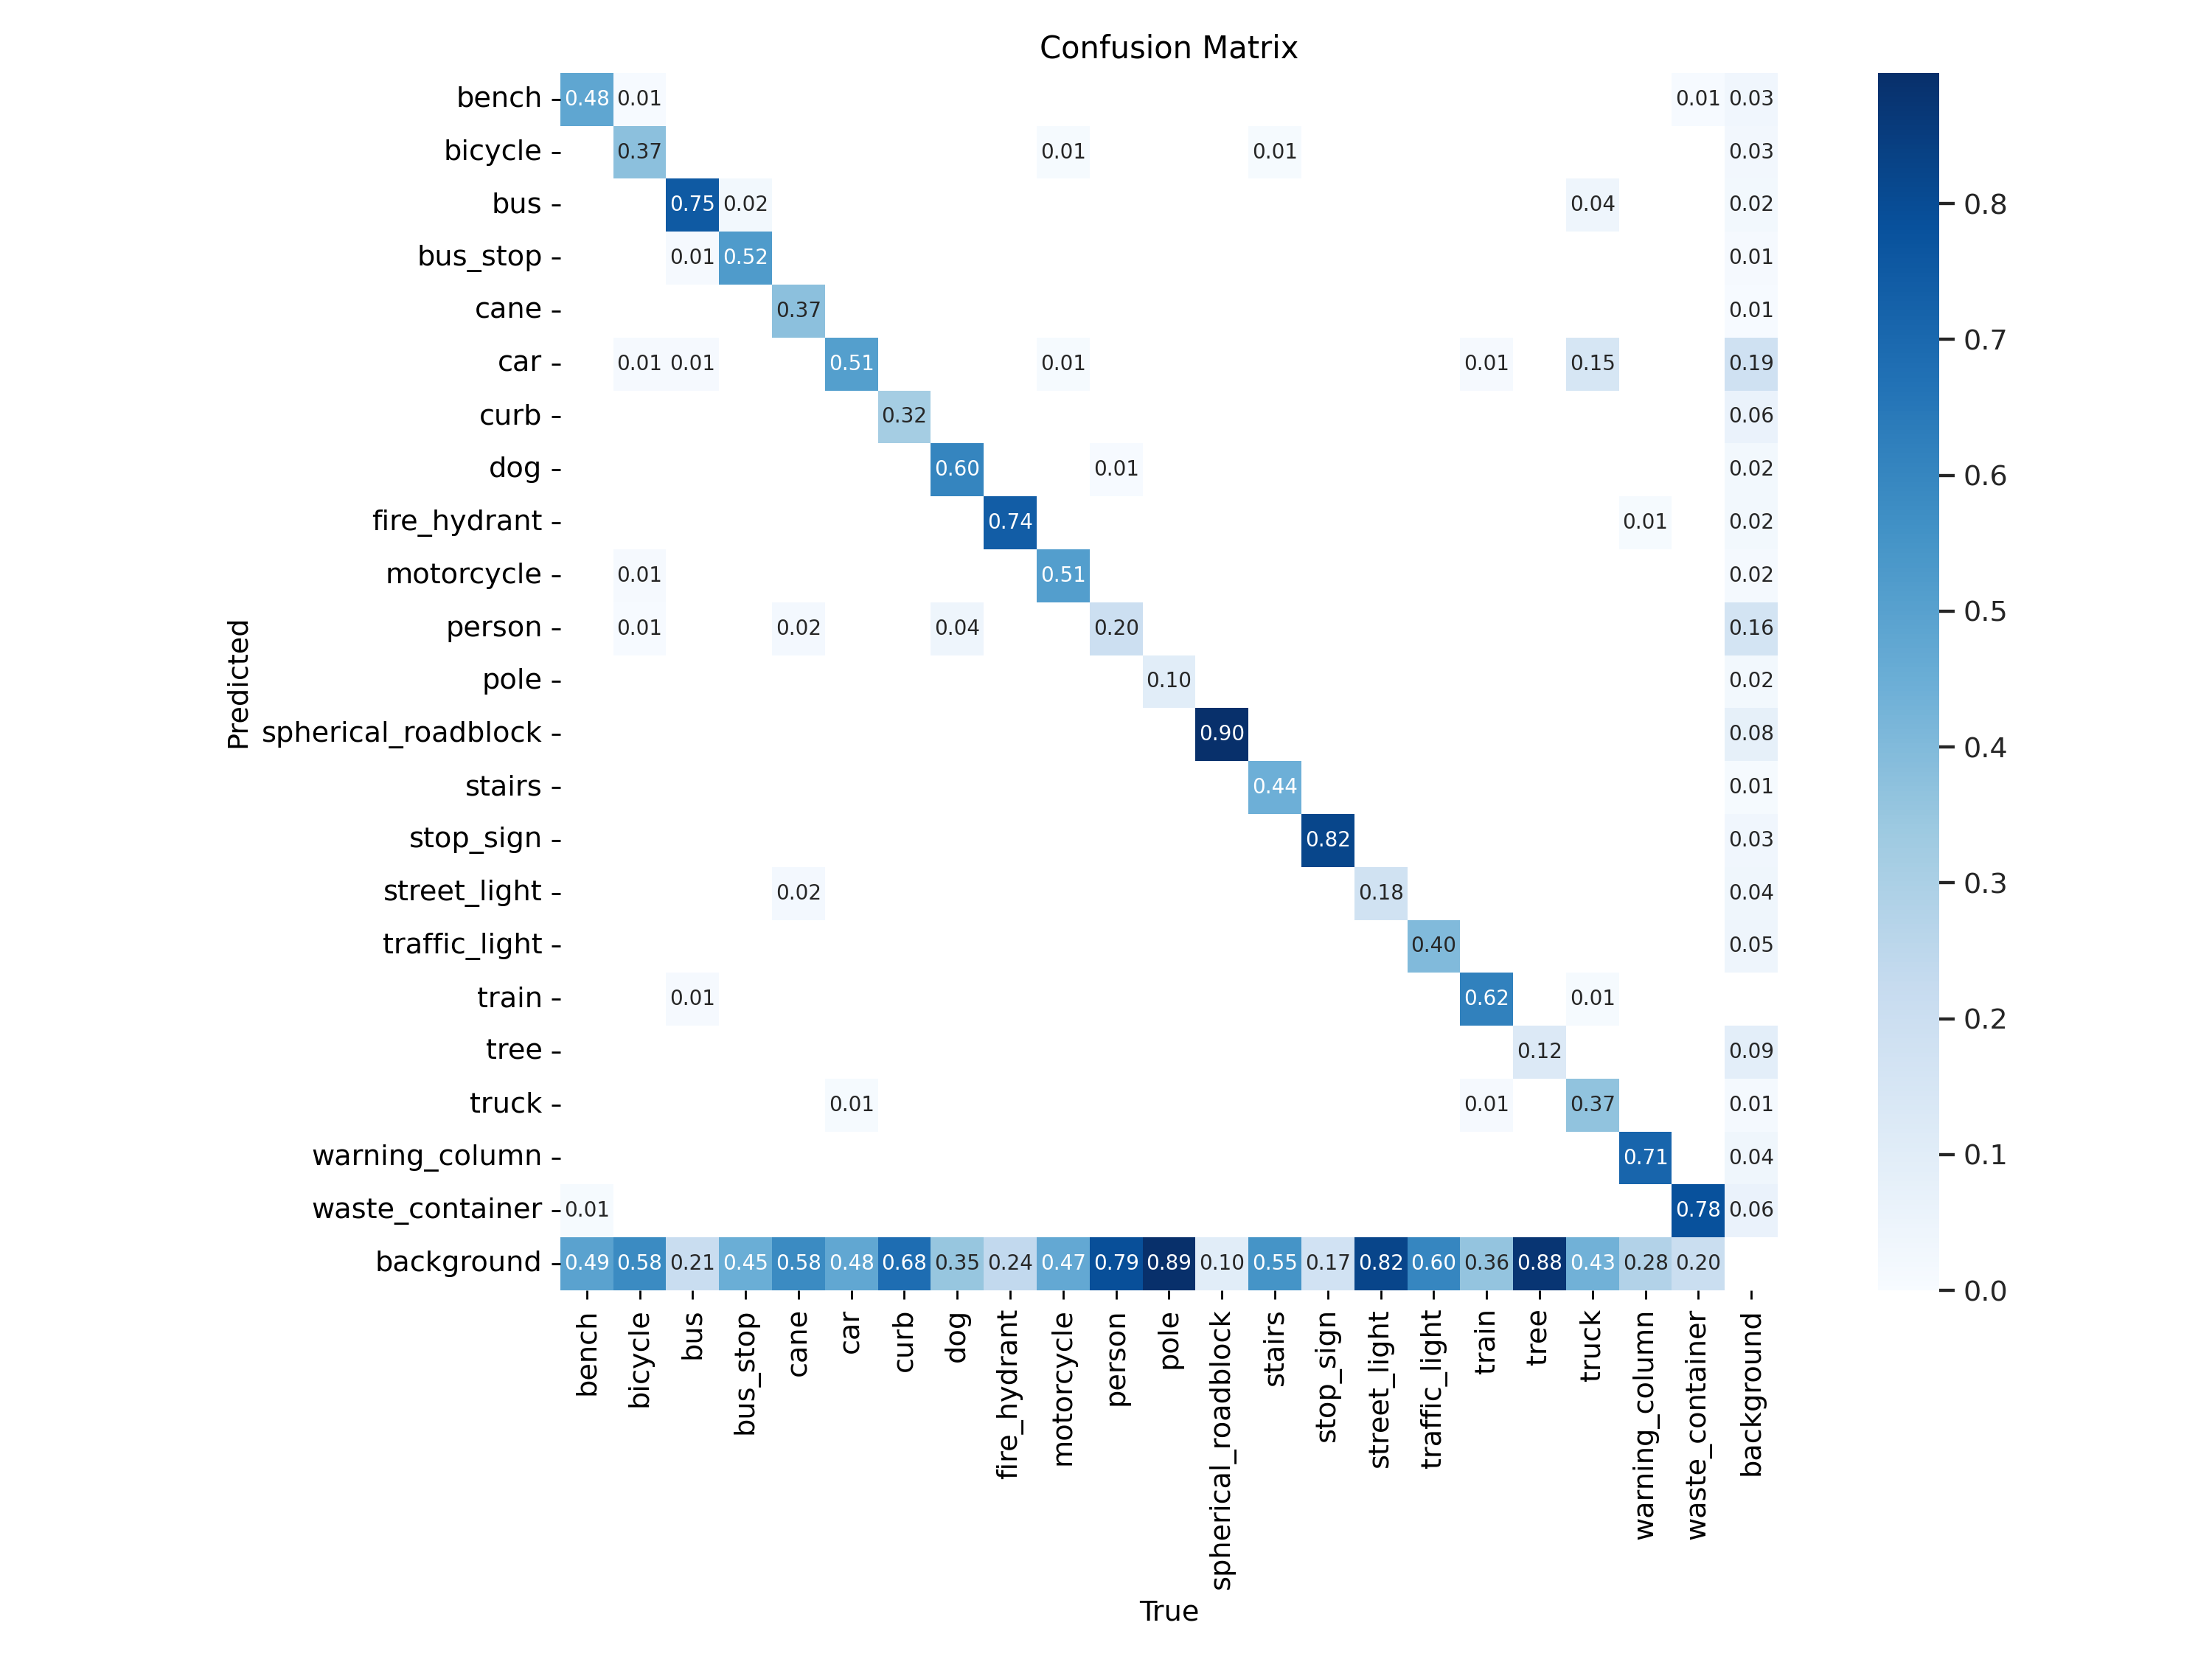

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/custom_model/yolov5n/confusion_matrix.png', width=640)

/content


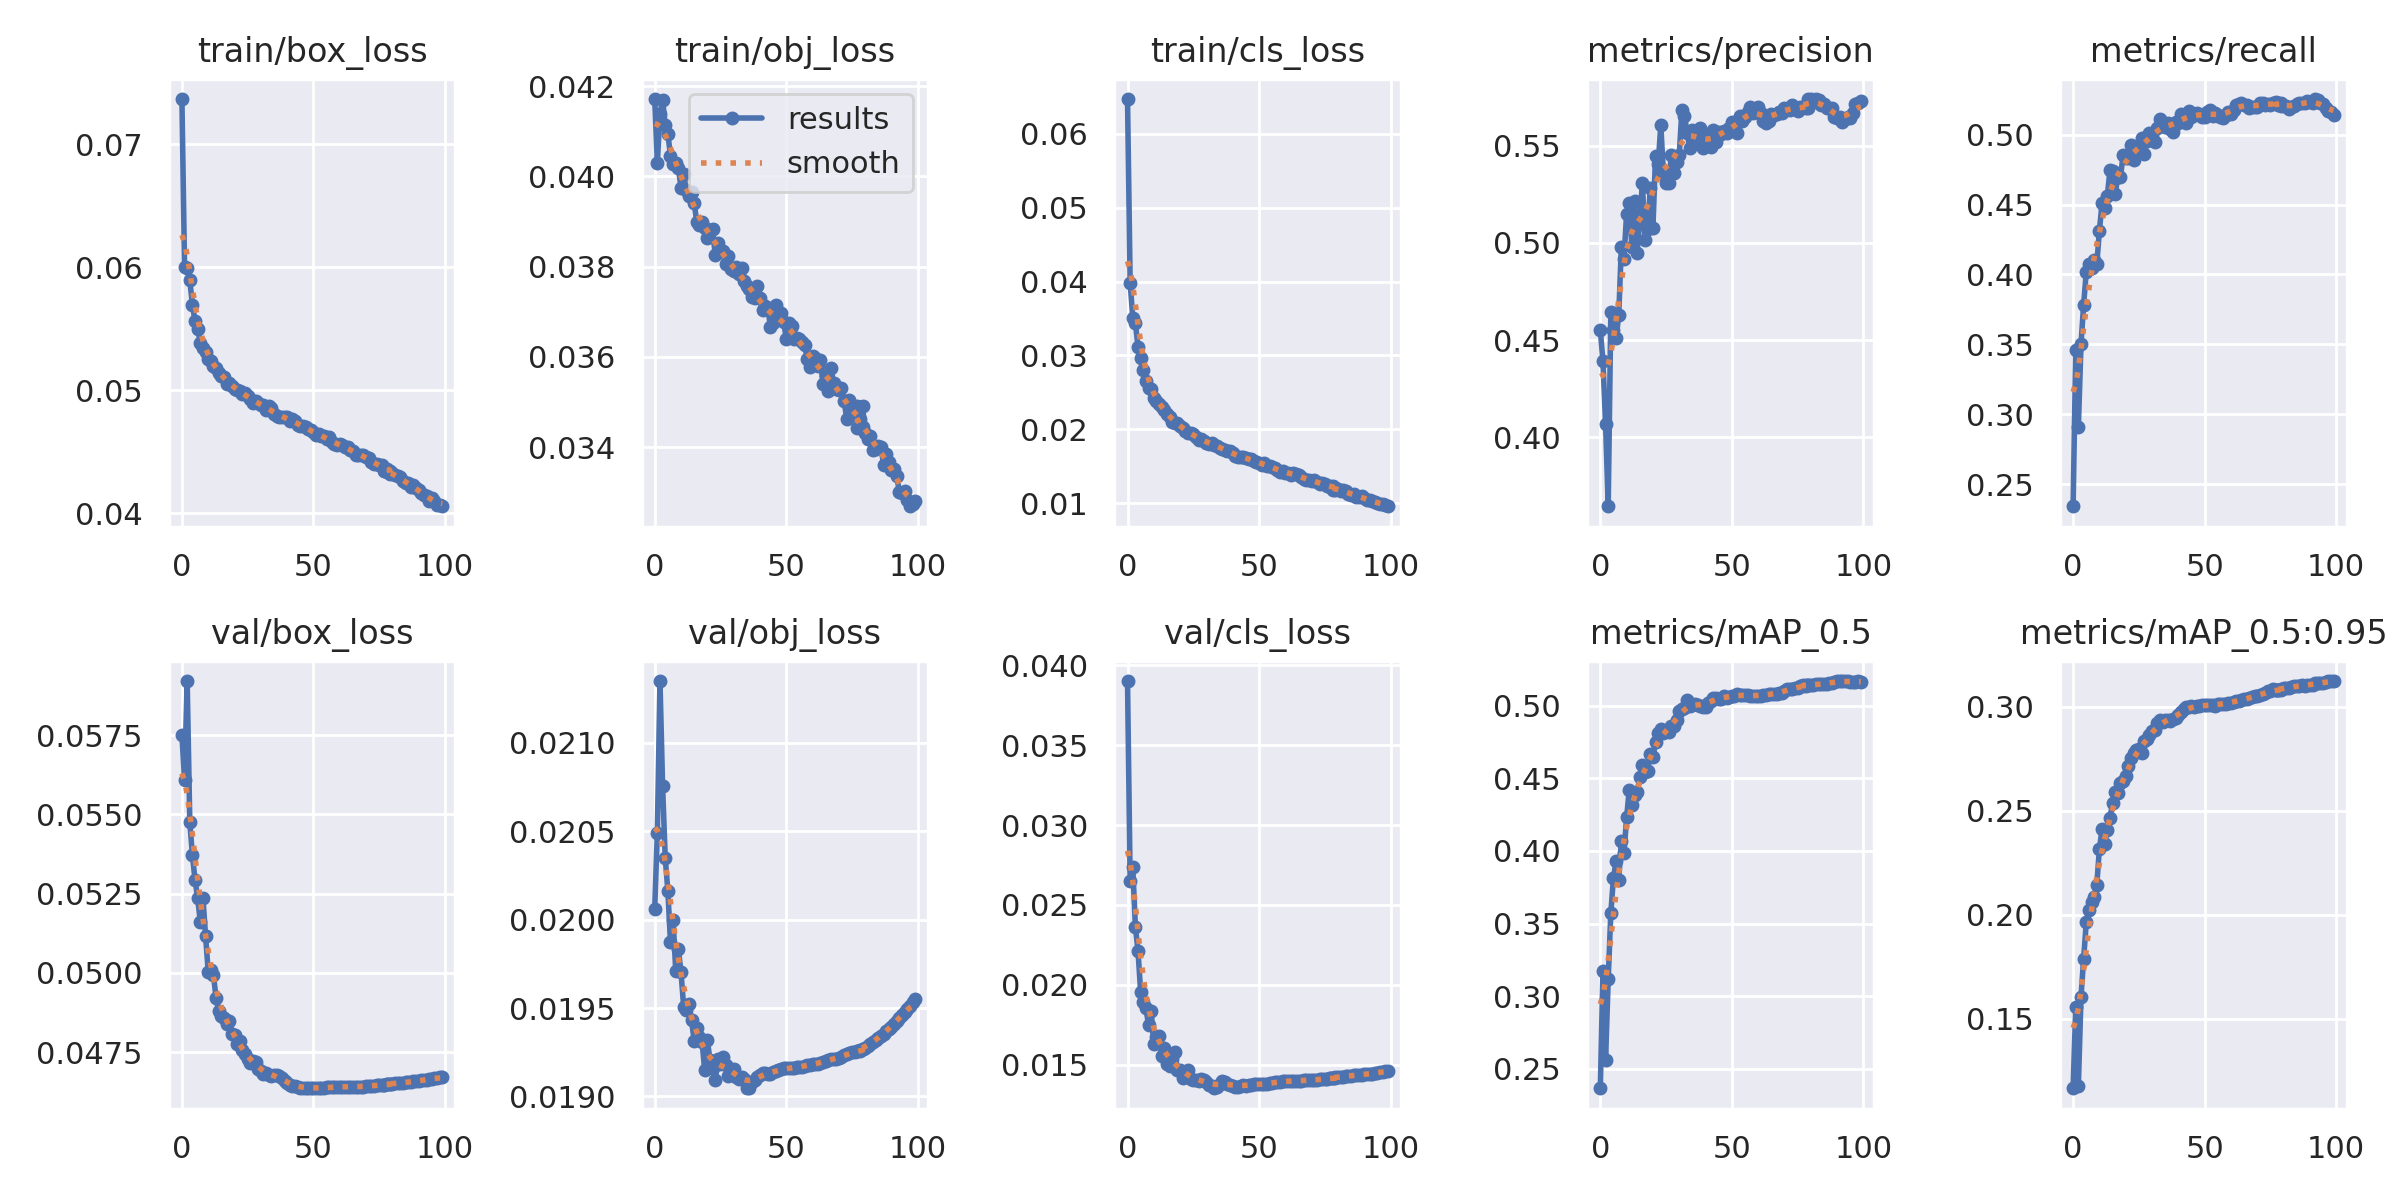

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/custom_model/yolov5n/results.png', width=640)

##8. Export in tflite format

We need to install a specific tensorflow version (tensorflow==2.13.1)

In [ ]:
!pip install tensorflow==2.13.1
import tensorflow as tf
print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 46.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    F

2.13.1


In [ ]:
%cd {HOME}/yolov5
!python export.py --data /content/yolov5/SOD-2/data.yaml --weights /content/custom_model/yolov5n/weights/best.pt --include tflite --int8 --img-size 640

/content/yolov5
export: data=/content/yolov5/SOD-2/data.yaml, weights=['/content/custom_model/yolov5n/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=True, per_tensor=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 1788931 parameters, 0 gradients, 4.2 GFLOPs

PyTorch: starting from /content/custom_model/yolov5n/weights/best.pt with output shape (1, 25200, 27) (3.8 MB)

TensorFlow SavedModel: starting export with tensorflow 2.13.1...

                 from  n    params  module                                  arguments                     
2024-06-23 15:18:57.820257: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR

In [ ]:
%cd {HOME}/yolov5
!python val.py --data /content/yolov5/SOD-2/data.yaml --weights /content/custom_model/yolov5n/weights/best-int8.tflite

/content/yolov5
val: data=/content/yolov5/SOD-2/data.yaml, weights=['/content/custom_model/yolov5n/weights/best-int8.tflite'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Loading /content/custom_model/yolov5n/weights/best-int8.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
Forcing --batch-size 1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/yolov5/SOD-2/valid/labels.cache... 2000 images, 0 backgrounds, 0 corrupt: 100% 2000/2000 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2000/2000 [03:57<00:00,  8.41it/s]
          

In [ ]:
%cd {HOME}/yolov5
!python detect.py --data /content/yolov5/SOD-2/data.yaml --source /content/yolov5/SOD-2/test/images --weights /content/custom_model/yolov5n/weights/best-int8.tflite --imgsz 640

/content/yolov5
detect: weights=['/content/custom_model/yolov5n/weights/best-int8.tflite'], source=/content/yolov5/SOD-2/test/images, data=/content/yolov5/SOD-2/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Loading /content/custom_model/yolov5n/weights/best-int8.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1000 /content/yolov5/SOD-2/test/images/000000004760_jpg.rf.a40a4cf8b36cf031c4134a0ef8ebf3e3.jpg: 640x640 2 benchs, 1 fire_hydrant, 1 tree, 139.2ms
im

/content


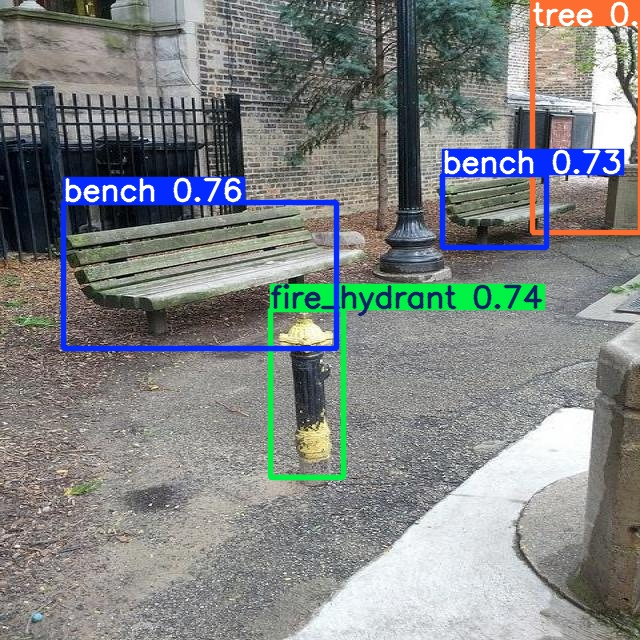

In [ ]:
%cd {HOME}
Image(filename='/content/yolov5/runs/detect/exp2/000000004760_jpg.rf.a40a4cf8b36cf031c4134a0ef8ebf3e3.jpg', height=640)

##9. Test with dark images subset and SOD-v2/test subset

In [ ]:
# Download dark-images
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="2ensUmd6I0CidUMAZrLf")
project = rf.workspace("ml-lab-w4mq4").project("100-dark")
version = project.version(8)
dataset = version.download("yolov5")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to 100-Dark-8 in yolov5pytorch:: 100%|██████████| 506/506 [00:00<00:00, 5917.32it/s]


In [ ]:
!mv /content/yolov5/SOD-2/valid /content/yolov5/SOD-2/validold
!mv /content/yolov5/100-Dark-8/valid /content/yolov5/SOD-2/

In [ ]:
#### valid with 250 dark images
!python val.py --data /content/yolov5/SOD-2/data.yaml --weights /content/drive/MyDrive/yoloModels_DataAug/yolov5n/weights/best.pt

val: data=/content/yolov5/SOD-2/data.yaml, weights=['/content/drive/MyDrive/yoloModels_DataAug/yolov5n/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1788931 parameters, 0 gradients, 4.2 GFLOPs
val: Scanning /content/yolov5/SOD-2/valid/labels... 250 images, 0 backgrounds, 0 corrupt: 100% 250/250 [00:00<00:00, 706.96it/s]
val: New cache created: /content/yolov5/SOD-2/valid/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 8/8 [00:08<00:00,  1.10s/it]
                   all        250        732      0.552      0.398      0.422      0.241
       

In [ ]:
!mv /content/yolov5/SOD-2/valid /content/yolov5/SOD-2/validold2
!mv /content/yolov5/SOD-2/test /content/yolov5/SOD-2/valid

In [ ]:
# valid 1000 images test subset
!python val.py --data /content/yolov5/SOD-2/data.yaml --weights /content/drive/MyDrive/yoloModels_DataAug/yolov5n/weights/best.pt

val: data=/content/yolov5/SOD-2/data.yaml, weights=['/content/drive/MyDrive/yoloModels_DataAug/yolov5n/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1788931 parameters, 0 gradients, 4.2 GFLOPs
val: Scanning /content/yolov5/SOD-2/valid/labels... 1000 images, 0 backgrounds, 0 corrupt: 100% 1000/1000 [00:00<00:00, 1628.20it/s]
val: New cache created: /content/yolov5/SOD-2/valid/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 32/32 [00:20<00:00,  1.54it/s]
                   all       1000       2960      0.585      0.502      0.516      0.315
 